In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('adult.data.txt',sep=',',names=['Age','Workclass','Fnlwgt','Education','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income'])
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32561, 14)

In [4]:
df.dtypes

Age               object
Workclass          int64
Fnlwgt            object
Education          int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Data Visualisation

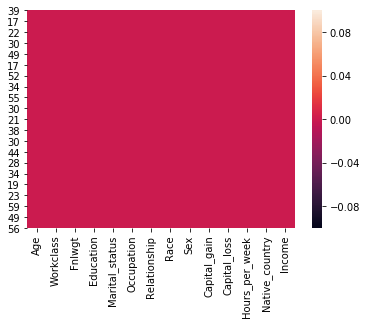

In [5]:
sns.heatmap(df.isnull())

In [6]:
# Now let's check the null values without using visualisation
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
# There are no null values

In [8]:
# Columns like Age,Fnlwgt,Marital_status,Occupation,Relationship,Race,Sex,Native_country & Income have string or object data

# We shall convert the columns having string or object data to numeric data using LabelEncoder


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# df['City']=le.fit_transform(df['City'])

list1=['Age','Fnlwgt','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [10]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [11]:
df.dtypes

Age               int32
Workclass         int64
Fnlwgt            int32
Education         int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Checking out the Correlation

In [12]:
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Workclass,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Fnlwgt,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_status,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Sex,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980
Capital_gain,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,0.011145,0.048480,1.000000,-0.031615,0.078409,-0.001982,0.223329


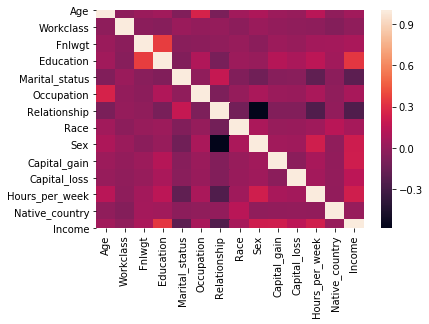

In [13]:
sns.heatmap(dfcor)

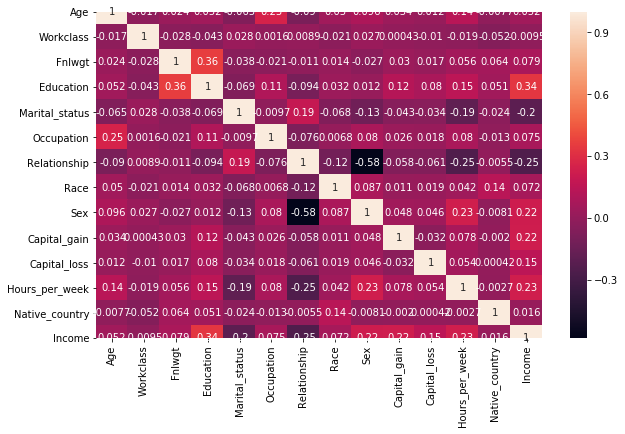

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True)

# Bivariate Analysis

In [15]:
# Let us now examine the impact of various input variables on the target/output variable i.e. Income

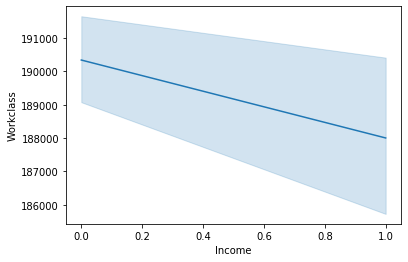

In [16]:
# Workclass vs Income


sns.lineplot(x=df['Income'],y=df['Workclass'],data=df)
plt.show()

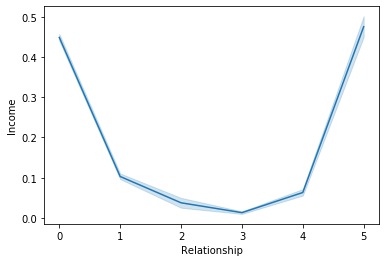

In [17]:
# Relationship vs Income

sns.lineplot(x=df['Relationship'],y=df['Income'],data=df)
plt.show()

# Unmarried people earn the most


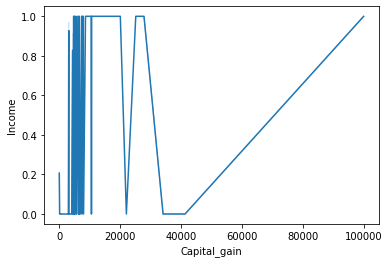

In [18]:
# Capital_gain vs Income


sns.lineplot(x=df['Capital_gain'],y=df['Income'],data=df)
plt.show()

#  Capital gain contributes to income

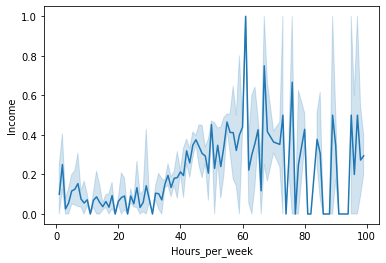

In [19]:
# Hours per week vs Income

sns.lineplot(x=df['Hours_per_week'],y=df['Income'],data=df)
plt.show()

# in general the number of hours spent per week  has a positive correlation with income


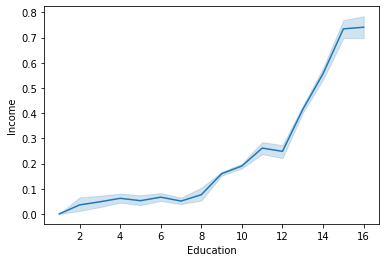

In [20]:
# Education vs Income

sns.lineplot(x=df['Education'],y=df['Income'],data=df)
plt.show()
 # People with education level of doctorate and above earn the most

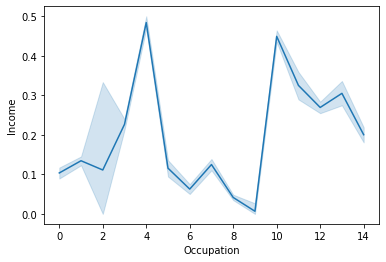

In [21]:
# Occupation vs Income


sns.lineplot(x=df['Occupation'],y=df['Income'],data=df)
plt.show()

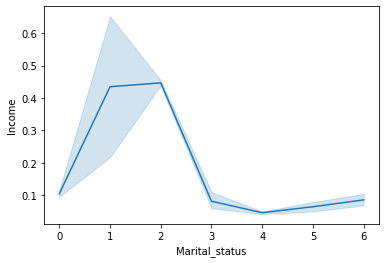

In [22]:
# Marital Status vs Income

sns.lineplot(x=df['Marital_status'],y=df['Income'],data=df)
plt.show()

# People who are never married earn the most

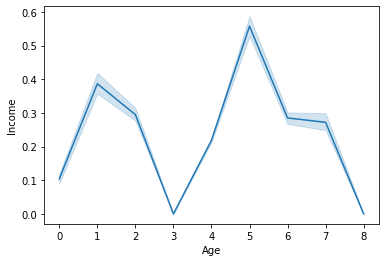

In [23]:
# Age vs Income


sns.lineplot(x=df['Age'],y=df['Income'],data=df)
plt.show()

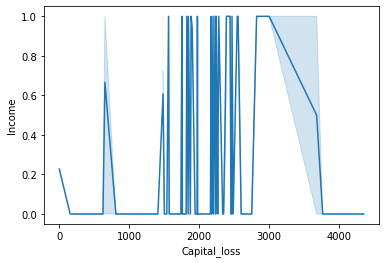

In [24]:
# Capital_loss vs Income

sns.lineplot(x=df['Capital_loss'],y=df['Income'],data=df)
plt.show()

# Capital loss leads to reduced income

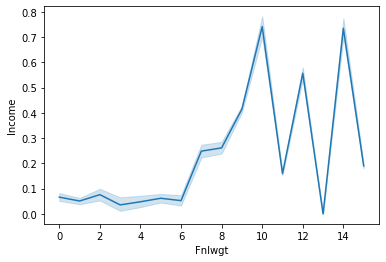

In [25]:
# Fnlwgt vs Income


sns.lineplot(x=df['Fnlwgt'],y=df['Income'],data=df)
plt.show()

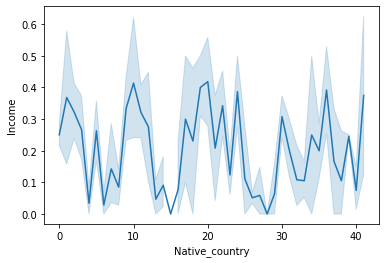

In [26]:
# Native_country vs Income


sns.lineplot(x=df['Native_country'],y=df['Income'],data=df)
plt.show()

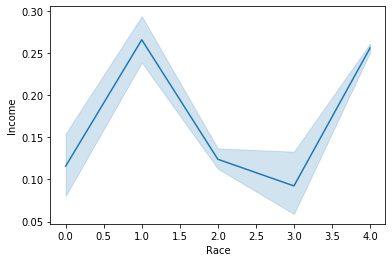

In [27]:
# Race vs Income

sns.lineplot(x=df['Race'],y=df['Income'],data=df)
plt.show()

# Whites earn the most

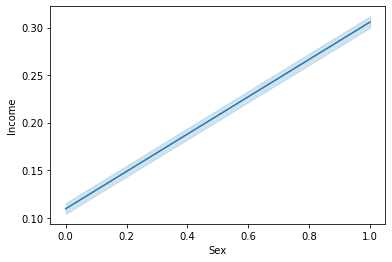

In [28]:
# Sex vs Income

sns.lineplot(x=df['Sex'],y=df['Income'],data=df)
plt.show()

# Males earn more than females

In [29]:
# Observations:
    
# Males earn more than females
    
# Whites earn the most

# Capital loss leads to reduced income

# Capital gain contributes to income

# People who are never married earn the most

# People with education level of doctorate and above earn the most

# in general the number of hours spent per week  has a positive correlation with income


# Lets check the skewness

In [30]:
collist=df.columns.values
ncol=12
nrows=10

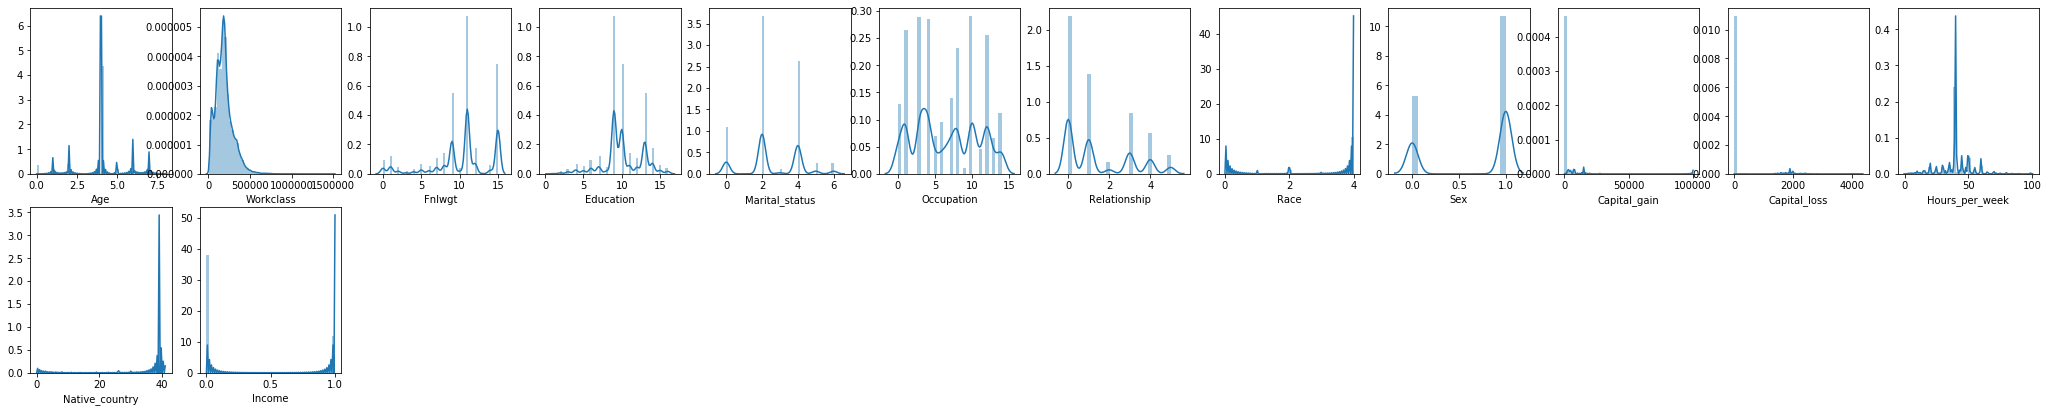

In [31]:
plt.figure(figsize=(36,36))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [32]:
# Separating the input and output variables for classification

df_x=df.drop(columns=['Income'])
df_x
y=df[['Income']]

In [33]:
# Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [34]:
# As the dataset is huge I have selected 4000 rows.........otherwise the system/Jupyter notebook gets hanged while running the classification algorithm

In [35]:
x=df.iloc[0:4000,0:-1]
x.shape

(4000, 13)

In [36]:
y=df.iloc[0:4000,-1]
y.shape

(4000,)

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.20,stratify=y)

In [38]:
print(x_train.shape,x_test.shape)

(3200, 13) (800, 13)


In [39]:
print(y_train.shape,y_test.shape)

(3200,) (800,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [41]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [42]:
models=[]
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

******************* KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score= 0.775


Cross_val_score=  0.7750094953718462


roc_auc_score:  0.5568182774789335


classification_report
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       603
           1       0.76      0.13      0.22       197

    accuracy                           0.78       800
   macro avg       0.77      0.56      0.54       800
weighted avg       0.77      0.78      0.71       800



[[595   8]
 [172  25]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************* SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, ra

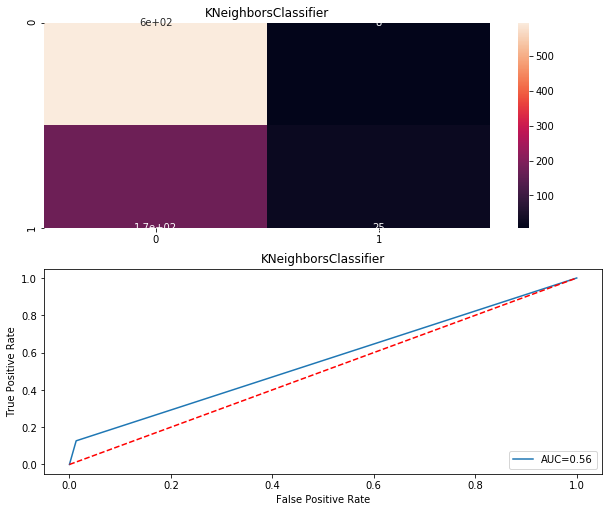

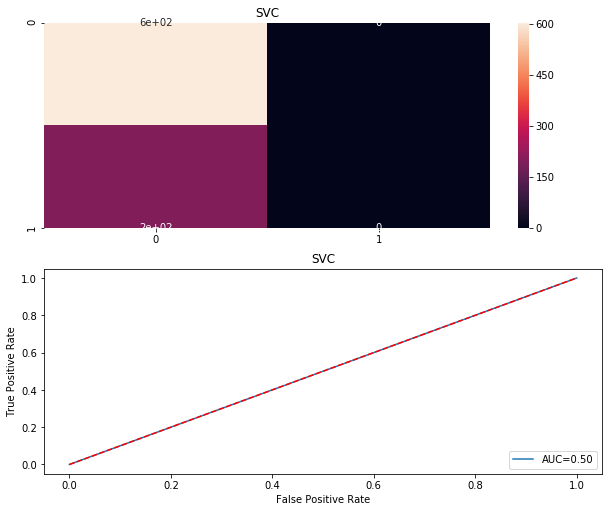

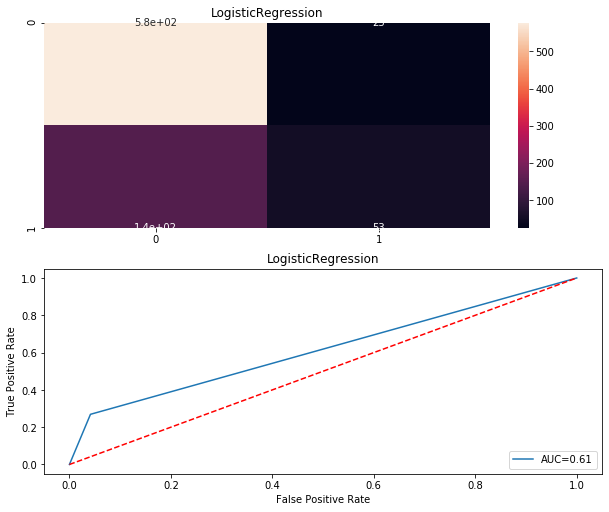

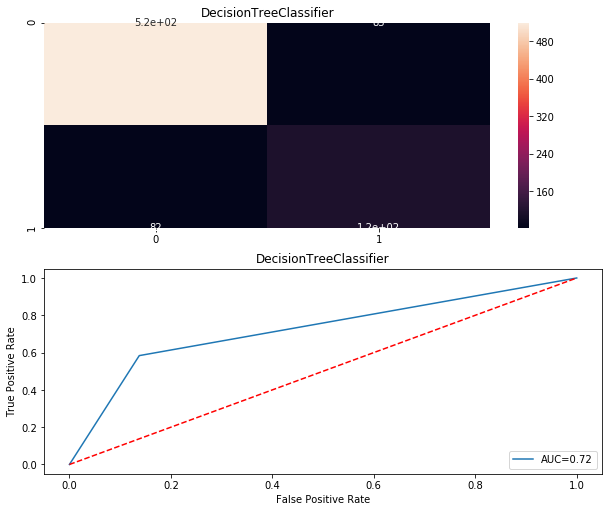

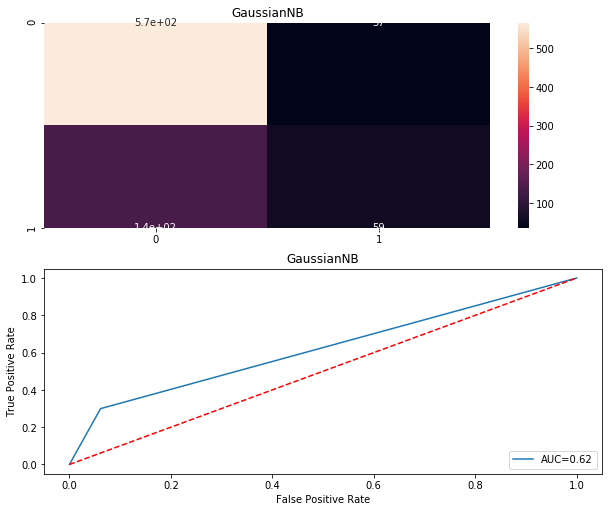

In [44]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*******************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    cv=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score= ',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [45]:
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_val_score':cvs,'ROC_AUC_Curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,ROC_AUC_Curve
0,KNeighborsClassifier,77.500,77.500950,55.681828
1,SVC,75.375,75.400127,50.000000
2,LogisticRegression,78.875,78.774581,61.378808
3,DecisionTreeClassifier,79.375,77.750139,72.305562
4,GaussianNB,78.125,78.825643,61.906626


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.82875
[[547  56]
 [ 81 116]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       603
           1       0.67      0.59      0.63       197

    accuracy                           0.83       800
   macro avg       0.77      0.75      0.76       800
weighted avg       0.82      0.83      0.82       800



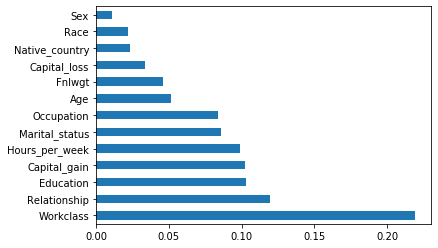

In [47]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

# The biggest advantage of Random forest classifier is that it provides the relative importance of input variables. For this income prediction problem, we are interested in knowing which factors contribute the most towards Income and Random Forest can provide us with this information. Thats the reason why we included this classification.

In [48]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:

joblib.dump(rf,'Census_and_income_prediction.csv')

['Census_and_income_prediction.csv']

In [50]:
model=joblib.load('Census_and_income_prediction.csv')

In [51]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
# Save the model

from sklearn.externals import joblib

# save the model as a pickle in a file

joblib.dump(rf,'income1.obj')
# load the model from the file

rf_from_joblib=joblib.load('income1.obj')

# Use the loaded model to make predictions

rf_from_joblib.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,